In [85]:
from mc import *
from matplotlib import pyplot as plt
import numpy as np
import time
from scipy.constants import Boltzmann

In [86]:

n_particles=int(1e4)
cell_len=2
cubic_size=25
box_size=5
r=1
m=1e-26
T=300
n_steps=1000
dt=1e-8
k_B = Boltzmann * 1e9
cubic_len = cubic_size * cell_len

time_start = time.time()
vs = np.concatenate((np.random.normal(loc=0, scale=np.sqrt(k_B * T / m), size=(n_particles, 2)), np.random.uniform(low=0, high=10 * np.sqrt(k_B * T / m), size=(n_particles, 1))), axis=1)
cubic = Cubic(n_particles=n_particles, cell_len=cell_len, cubic_size=cubic_size, box_size=box_size, r=r, m=m, T=T, equ=False, vs=vs)

nσ^3 = 0.64


In [87]:
cubic.run(n_steps=n_steps, dt=dt)

T = 3588.294072 K: 100%|██████████| 1000/1000 [09:56<00:00,  1.68it/s]


Text(0, 0.5, 'Kinetic Pressure Tensor diagonal')

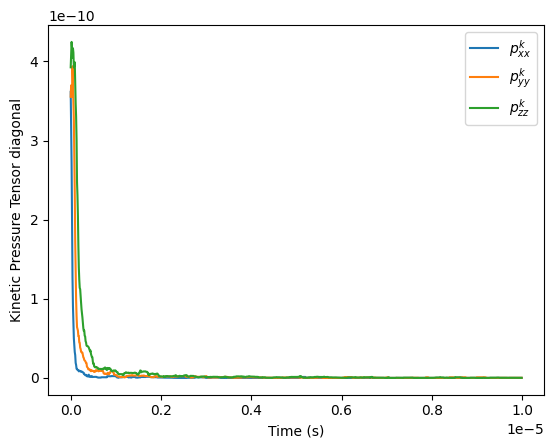

In [88]:
pk_xx, pk_yy, pk_zz = [], [], []
for pk in cubic.pks:
    pk_xx.append(np.mean(pk[:,0,0]))
    pk_yy.append(np.mean(pk[:,1,1]))
    pk_zz.append(np.mean(pk[:,2,2]))
plt.plot(cubic.ts, pk_xx)
plt.plot(cubic.ts, pk_yy)
plt.plot(cubic.ts, pk_zz)
plt.legend(['$p^k_{xx}$', '$p^k_{yy}$', '$p^k_{zz}$'])
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Pressure Tensor diagonal')

Text(0, 0.5, 'Velocity')

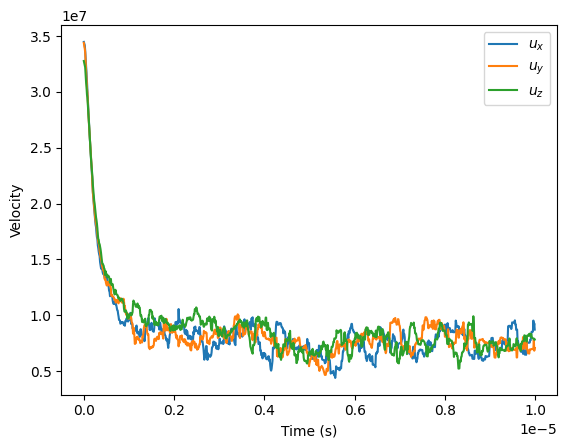

In [89]:
u_x, u_y, u_z = [], [], []
for u in cubic.us:
    u_x.append(np.mean(u[:,0]))
    u_y.append(np.mean(u[:,1]))
    u_z.append(np.mean(u[:,2]))
plt.plot(cubic.ts, u_x)
plt.plot(cubic.ts, u_y)
plt.plot(cubic.ts, u_z)
plt.legend(['$u_x$', '$u_y$', '$u_z$'])
plt.xlabel('Time (s)')
plt.ylabel('Velocity')

Text(0, 0.5, 'Velocity')

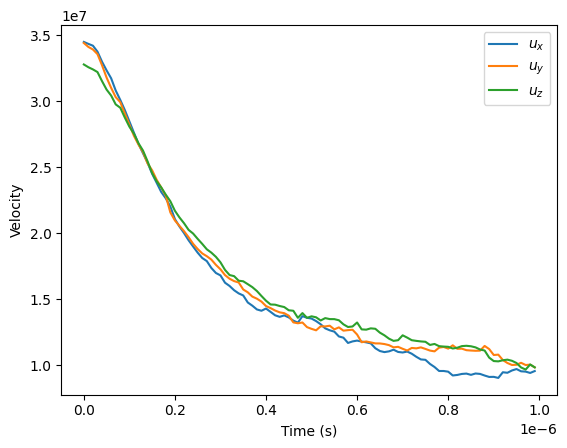

In [104]:
plt.plot(cubic.ts[:100], np.array(u_x)[:100])
plt.plot(cubic.ts[:100], np.array(u_y)[:100])
plt.plot(cubic.ts[:100], np.array(u_z)[:100])
plt.legend(['$u_x$', '$u_y$', '$u_z$'])
plt.xlabel('Time (s)')
plt.ylabel('Velocity')

Text(0, 0.5, 'Kinetic Heat Flux')

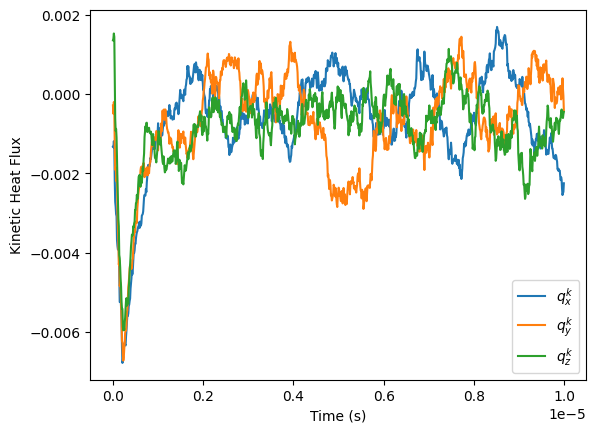

In [90]:
qk_x, qk_y, qk_z = [], [], []
for q in cubic.qks:
    qk_x.append(np.mean(q[:,0]))
    qk_y.append(np.mean(q[:,1]))
    qk_z.append(np.mean(q[:,2]))
plt.plot(cubic.ts, qk_x)
plt.plot(cubic.ts, qk_y)
plt.plot(cubic.ts, qk_z)
plt.legend(['$q^k_x$', '$q^k_y$', '$q^k_z$'])
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Heat Flux')

Text(0, 0.5, 'Kinetic Heat Flux')

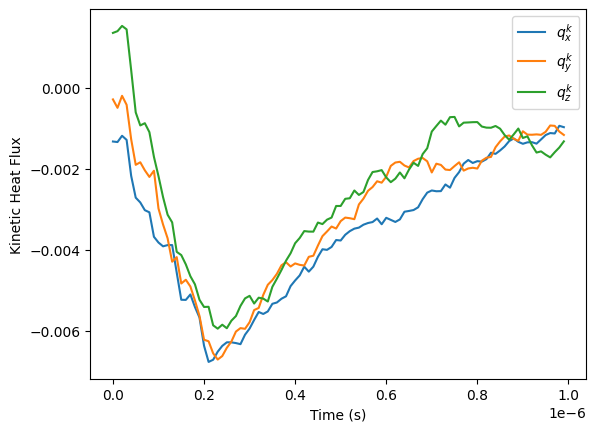

In [103]:
plt.plot(cubic.ts[:100], qk_x[:100])
plt.plot(cubic.ts[:100], qk_y[:100])
plt.plot(cubic.ts[:100], qk_z[:100])
plt.legend(['$q^k_x$', '$q^k_y$', '$q^k_z$'])
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Heat Flux')

Text(0, 0.5, 'Temperature (K)')

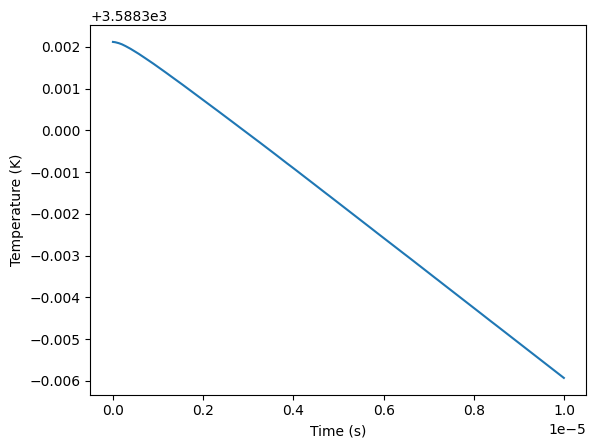

In [91]:
plt.plot(cubic.ts, cubic.Ts)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

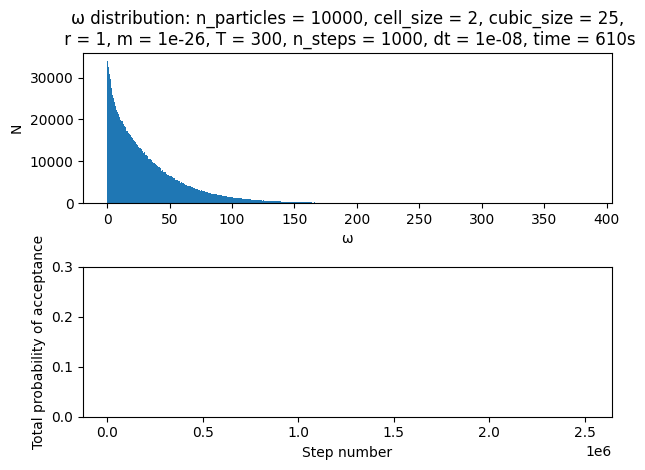

In [92]:
fig, axs = plt.subplots(2)
counts, bins, patches = axs[0].hist(cubic.ωs, bins=1000)
axs[0].set_xlabel('ω')
axs[0].set_ylabel('N')
axs[0].set_title('ω distribution: n_particles = {}, cell_size = {}, cubic_size = {},\n r = {}, m = {}, T = {}, n_steps = {}, dt = {}, time = {}s'.format(n_particles, cell_len, cubic_size, r, m, T, n_steps, dt, round(time.time() - time_start)))

# Store the mean probabilities at each step
mean_probs = []

total_trials = 0
accepted_trials = 0

for ω in cubic.ωs:
    # Generate a random number
    rand_num = np.random.random()

    # If the random number is less than ω, increment the number of accepted trials
    if rand_num < ω:
        accepted_trials += 1

    # Increment the total number of trials
    total_trials += 1

    # Calculate the mean probability of acceptance and store it
    mean_prob = accepted_trials / total_trials
    mean_probs.append(mean_prob)

# Plot the mean probabilities
axs[1].plot(mean_probs)
axs[1].set_xlabel('Step number')
axs[1].set_ylabel('Total probability of acceptance')
axs[1].set_ylim(0, 0.3)

# Adjust the space between the subplots
plt.tight_layout()

Text(0, 0.5, 'Mean probability of acceptance')

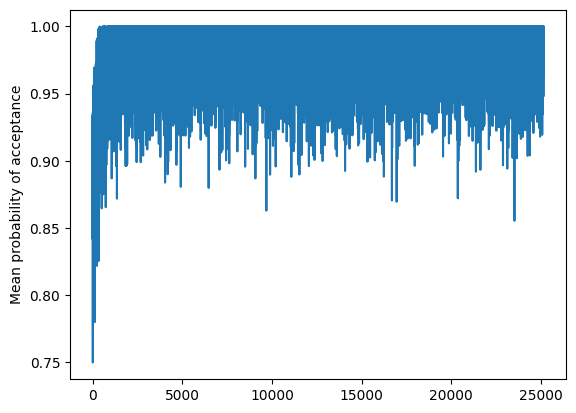

In [98]:
# acceptance per 5000
total_trials = 0
accepted_trials = 0
n_bin = 100
mean_probs = []
mean_means = []
for ω in cubic.ωs:
    if np.random.random() < ω:
        accepted_trials += 1
    total_trials += 1
    mean_prob = accepted_trials / total_trials
    mean_probs.append(mean_prob)
    
    if total_trials == n_bin:
        mean_means.append(np.mean(mean_probs))
        total_trials = accepted_trials = 0
        mean_probs = []

plt.plot(mean_means)
plt.ylabel('Mean probability of acceptance')

Text(0, 0.5, 'Kinetic Pressure Tensor off-diagonal')

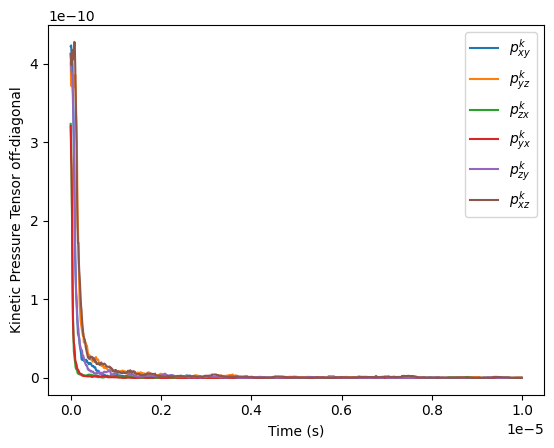

In [94]:
pk_xy, pk_yz, pk_zx, pk_yx, pk_zy, pk_xz = [], [], [], [], [], []
for pk in cubic.pks:
    pk_xy.append(np.mean(pk[:,0,1]))
    pk_yz.append(np.mean(pk[:,1,2]))
    pk_zx.append(np.mean(pk[:,2,0]))
    pk_yx.append(np.mean(pk[:,1,0]))
    pk_zy.append(np.mean(pk[:,2,1]))
    pk_xz.append(np.mean(pk[:,0,2]))
plt.plot(cubic.ts, pk_xy)
plt.plot(cubic.ts, pk_yz)
plt.plot(cubic.ts, pk_zx)
plt.plot(cubic.ts, pk_yx)
plt.plot(cubic.ts, pk_zy)
plt.plot(cubic.ts, pk_xz)
plt.legend(['$p^k_{xy}$', '$p^k_{yz}$', '$p^k_{zx}$', '$p^k_{yx}$', '$p^k_{zy}$', '$p^k_{xz}$'])
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Pressure Tensor off-diagonal')

Text(0, 0.5, 'Kinetic Pressure Tensor off-diagonal')

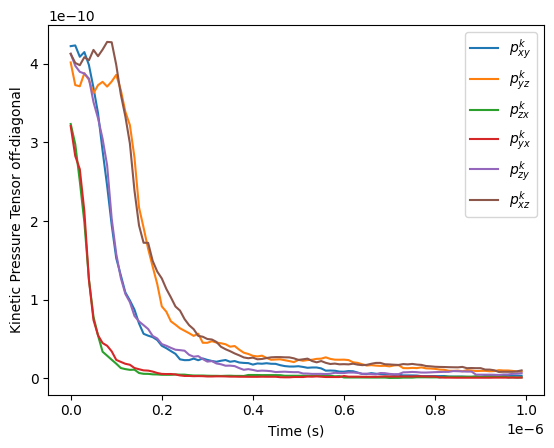

In [105]:
plt.plot(cubic.ts[:100], pk_xy[:100])
plt.plot(cubic.ts[:100], pk_yz[:100])
plt.plot(cubic.ts[:100], pk_zx[:100])
plt.plot(cubic.ts[:100], pk_yx[:100])
plt.plot(cubic.ts[:100], pk_zy[:100])
plt.plot(cubic.ts[:100], pk_xz[:100])
plt.legend(['$p^k_{xy}$', '$p^k_{yz}$', '$p^k_{zx}$', '$p^k_{yx}$', '$p^k_{zy}$', '$p^k_{xz}$'])
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Pressure Tensor off-diagonal')

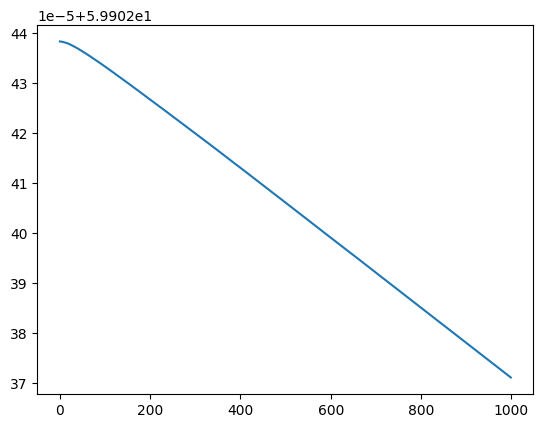

In [95]:
plt.plot(np.sqrt(cubic.Ts))

The linear relation between sqrt_t and p^k_zx is: p^k_zx = 6.767467075505632e-09 * sqrt_t + -4.053873695739017e-07


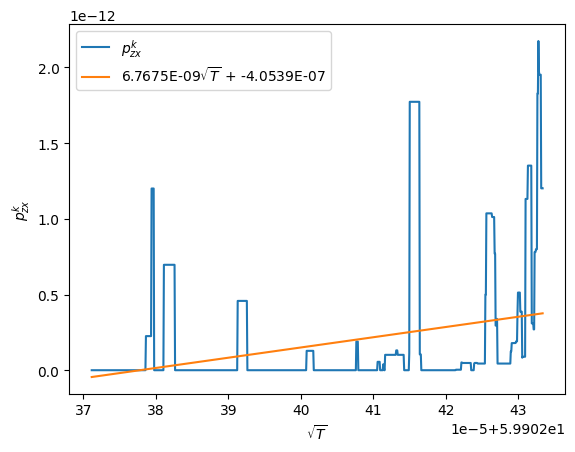

In [106]:
import numpy as np

# Convert the time values to square root
sqrt_t = np.sqrt(cubic.Ts[100:])

# Get the p^k_zx values
p_k_zx = np.array(pk_zx[100:])

# Perform linear regression
coefficients = np.polyfit(sqrt_t, p_k_zx, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Print the linear relation
print(f"The linear relation between sqrt_t and p^k_zx is: p^k_zx = {slope} * sqrt_t + {intercept}")

plt.plot(sqrt_t, p_k_zx)
plt.plot(sqrt_t, slope * sqrt_t + intercept)
plt.xlabel(r'$\sqrt{T}$')
plt.ylabel(r'$p^k_{zx}$')
plt.legend([r'$p^k_{zx}$', f'{slope:.4E}'+ r'$\sqrt{T}$' + f' + {intercept:.4E}'])

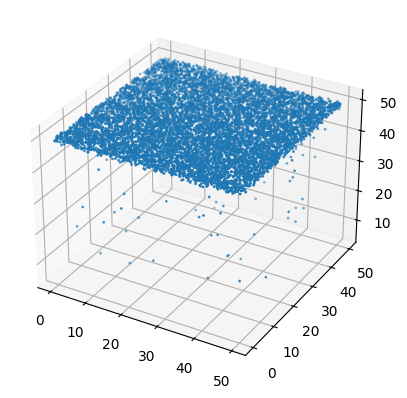

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cubic.particles()[:, 0], cubic.particles()[:, 1], cubic.particles()[:, 2], s=1)